# 1. Install Dependencies and Setup

In [7]:
!pip install tensorflow opencv-python matplotlib

In [8]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        4.0.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asgiref                      3.7.2
asttokens                    2.4.0
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
cachetools                   5.3.1
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
chex                         0.1.7
comm                         0.1.4
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7.post1
decorator                    5.1.1
defusedxml                   

In [9]:
import tensorflow as tf
import os

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
tf.config.list_physical_devices('GPU')

[]

<h4>Load data<h4>

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 204 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
# class 0 = aegyopitus
# class 1 = albopictus
batch[1]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

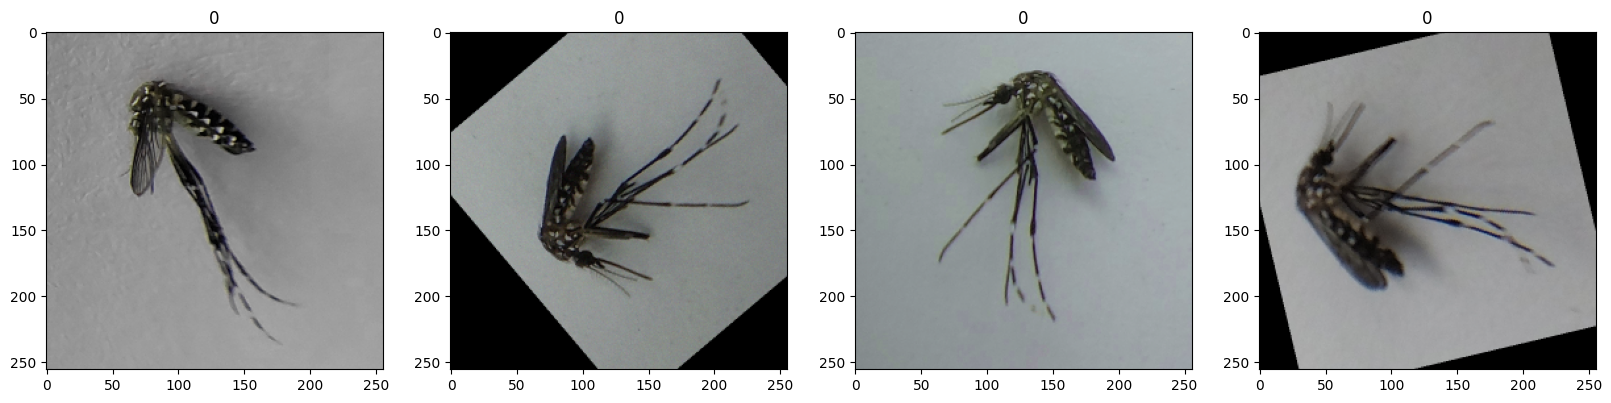

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
scaled = batch[0]/250

<h6>Processing data</h6>

<h4>Scale data</h4>

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

<h4>Split data</h4>

In [22]:
len(data)

7

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<h4>Build deep learning model</h4>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

<h4>Train</h4>

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 1.5118 - accuracy: 0.5078 - val_loss: 1.0567 - val_accuracy: 0.4531
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 0.8411 - accuracy: 0.5078 - val_loss: 0.6749 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 0.6950 - accuracy: 0.4844 - val_loss: 0.6952 - val_accuracy: 0.4375
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.6910 - accuracy: 0.5938 - val_loss: 0.6830 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.6808 - accuracy: 0.7031 - val_loss: 0.6688 - val_accuracy: 0.7812
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.6599 - accuracy: 0.6250 - val_loss: 0.6274 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 0.6299 - accuracy: 0.6484 - val_loss: 0.7118 - val_accuracy: 0.4844
Epoch 8/20
4/4 [=========================

<h4>Plot performance</h4>

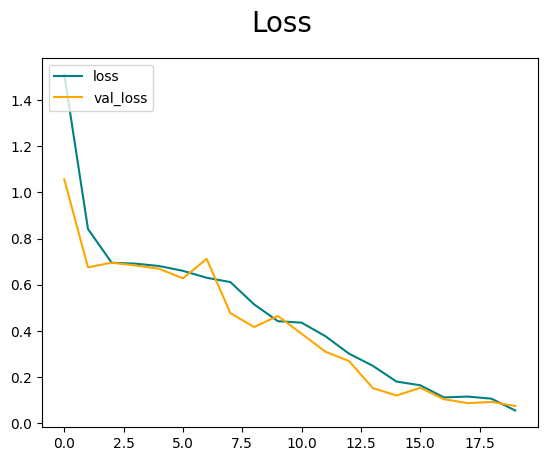

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

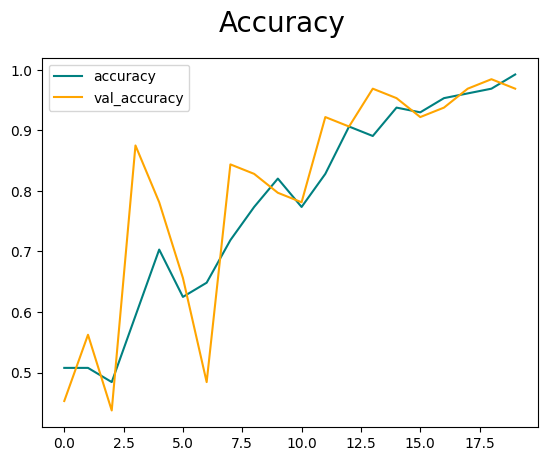

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h6>Evaluate performance</h6>

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 179ms/step


In [38]:
print(pre.result(), re.result(), acc.result()) 

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


<h6>Test</h6>

In [39]:
import cv2

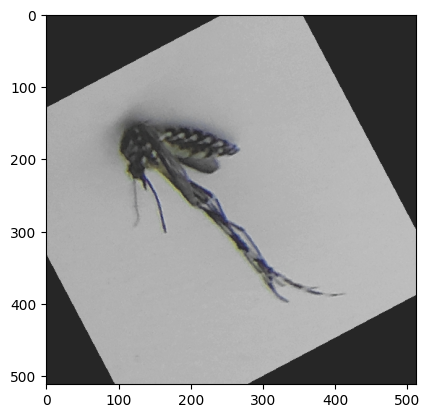

In [40]:
img = cv2.imread('Ae_aegypti_test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

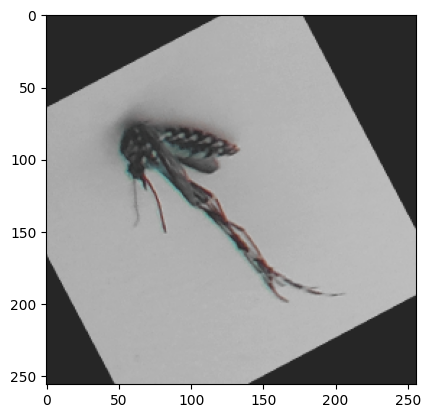

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [43]:
yhat

array([[0.00845229]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is albopictus')
else:
    print(f'Predicted class is aegypti')

Predicted class is aegypti


<h6>Save the Model</h6>

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models', 'imageclassifier.h5'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [48]:
!pip install tensorflowjs

In [49]:
import tensorflowjs as tfjs

In [50]:
tfjs.converters.save_keras_model(model, 'ImageClassification-main')